
<h1> <font color='blue'>Time_Series_Analysis_Anomaly_Detection_S&P500</font></h1>

<h3> Designing and Training LSTM Autoencoder using Keras APi as Tensorflow 2.0 backend </h3>
<h3> Case Study: S & P 500 Index Market in USA between 1986-2018</h3>


<h1>About Dataset</h1>
Context

It is surprisingly hard to find Daily price data for S&P500 index that goes back more than a few years. Most public data only goes back to the 2000's , or if it's longer term, is weekly frequency instead of daily. So I have compiled this dataset containing Daily Closing Prices for the SPY going from 1986 to 2018.
Content

The dataset is simple - a CSV format with one column with a daily timestamp and the second with the raw, un-adjusted closing prices for each day.

## Task 1: Project Overview and Import Libraries

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.14.0


## Task 2: Load and Inspect the S&P 500 Index Data

[Data Source](https://www.kaggle.com/pdquant/sp500-daily-19862018): S&P500 Daily Prices 1986 - 2018

In [3]:
# S&P is stock market company for top 500 companies listed in US
# Read the S&P 500 Index data, which includes dates and closing prices.
df = pd.read_csv('S&P_500_Index_Data.csv',parse_dates=['date']) #read dataset'
df.head()

,date,close
0,1986-01-02,209.59
1,1986-01-03,210.88
2,1986-01-06,210.65
3,1986-01-07,213.80
4,1986-01-08,207.97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8192 non-null   datetime64[ns]
 1   close   8192 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.1 KB


In [5]:
df.shape

(8192, 2)

<h2> # Section 3: Exploratory Data Analysis (EDA)
# Explore the characteristics of the time series data and visualize patterns.</h>


Summary Statistics:
count    8192.000000
mean     1070.897411
std       616.714534
min       203.490000
25%       458.632500
50%      1106.435000
75%      1388.132500
max      2872.870000
Name: close, dtype: float64


Missing Values:
date     0
close    0
dtype: int64




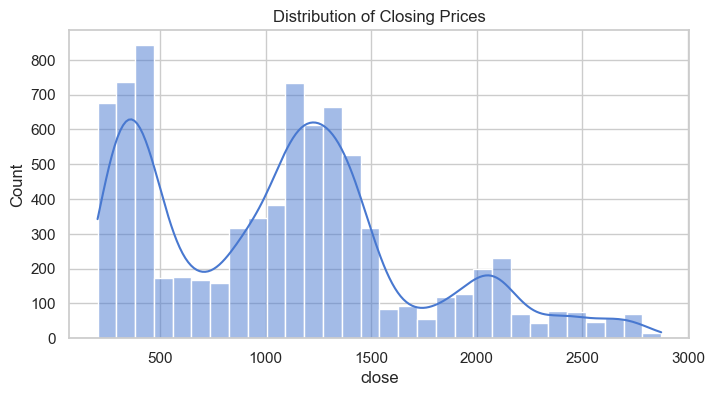

C:\Users\user\AppData\Local\Temp\ipykernel_5472\2799878578.py:34: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



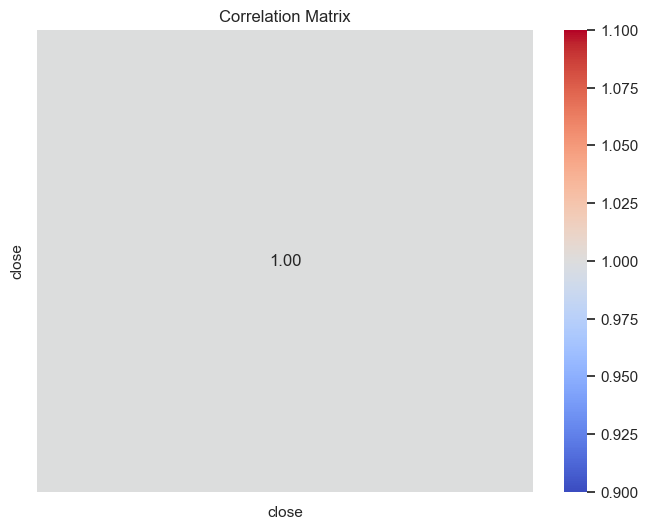

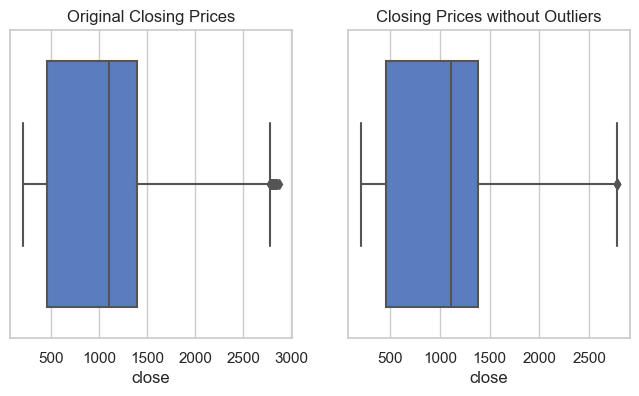

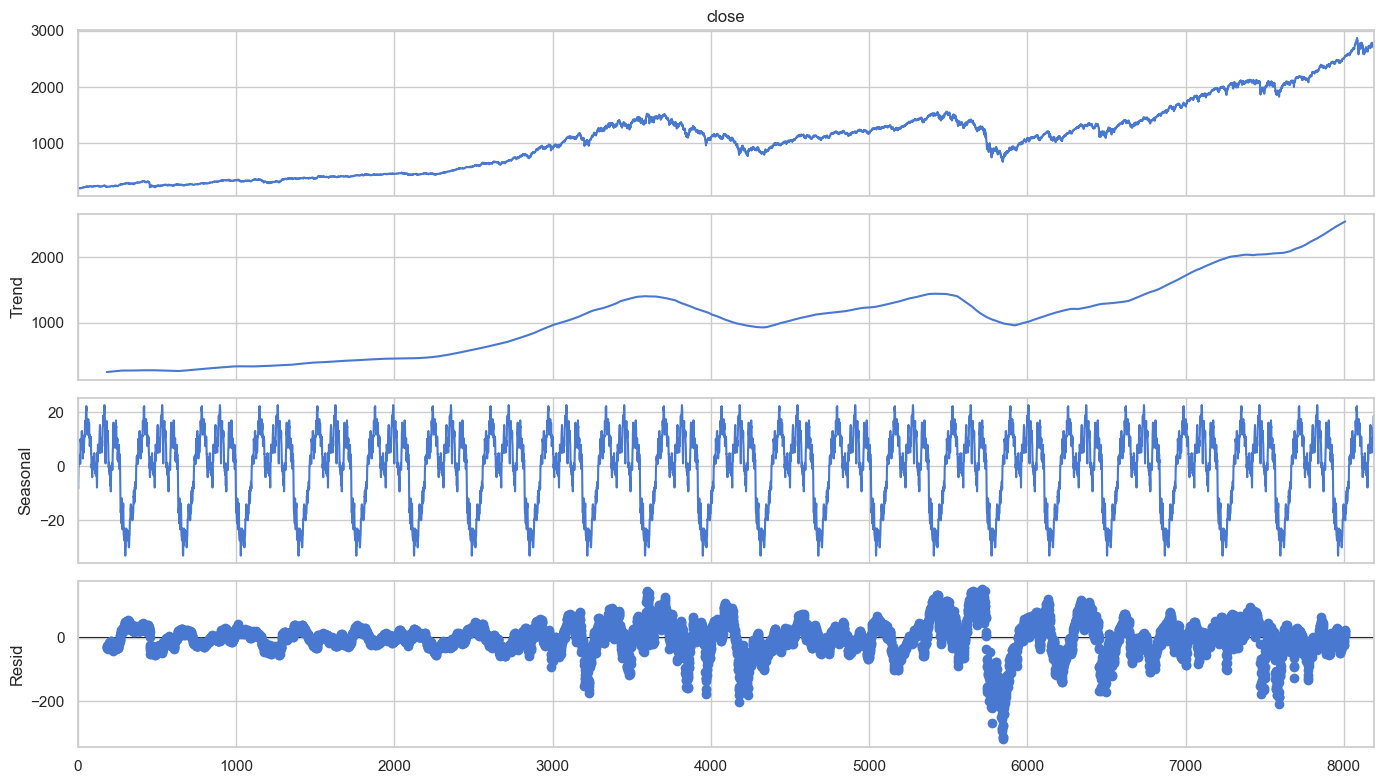

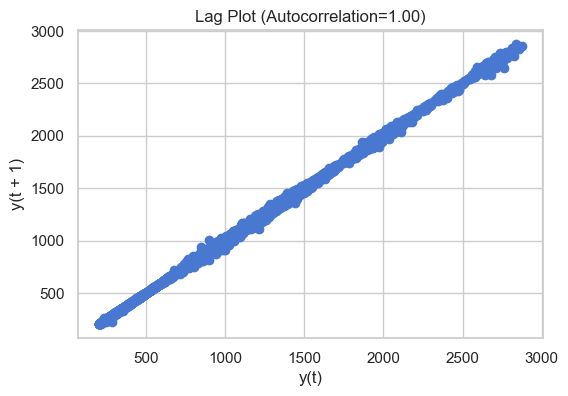

' it calculates the autocorrelation of the closing prices and creates\n a lag plot to visualize the relationship between the closing prices \n and their lagged values. This helps identify patterns in the time\n   series data. '

In [32]:
# Exploratory Data Analysis (EDA)

# 1. Summary Statistics
print("Summary Statistics:")
print(df['close'].describe())
print("\n")

'''This section prints summary statistics for the
 'close' column of the DataFrame, including count
 , mean, std (standard deviation), min, 25th percentile,
   median, 75th percentile, and max.'''

# 2. Missing Values
print("Missing Values:")
print(df.isnull().sum())
print("\n")

'''This part prints the count of missing values for each column in
   the DataFrame. It helps identify if there are any missing values in the dataset.'''

# 3. Data Distribution Visualization
plt.figure(figsize=(8, 4))
sns.histplot(df['close'], kde=True, bins=30)
plt.title('Distribution of Closing Prices')
plt.show()
print("\n")

''' it creates a histogram and kernel density plot to 
visualize the distribution of closing prices.
 This helps in understanding the spread and
   shape of the closing prices.'''

# 4. Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print("\n")

'''This section calculates and visualizes the correlation 
matrix between different columns. 
It helps understand how the closing prices correlate 
with other variables.'''


# 5. Outlier Detection
Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df['close'] < Q1 - 1.5 * IQR) | (df['close'] > Q3 + 1.5 * IQR)
df_no_outliers = df[~outliers]

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['close'])
plt.title('Original Closing Prices')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['close'])
plt.title('Closing Prices without Outliers')
plt.show()
print("\n")

'''This part detects outliers using the Interquartile
 Range (IQR) method and creates boxplots to visualize
   the distribution of closing prices with and without
     outliers.'''

# 6. Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['close'], model='additive', period=365)
result.plot()
plt.show()
print("\n")

'''This section decomposes the time series into trend,
 seasonality, and residual components using a seasonal
   decomposition method.'''

# 7. Autocorrelation Analysis
autocorrelation = df['close'].autocorr()

plt.figure(figsize=(6, 4))
pd.plotting.lag_plot(df['close'])
plt.title(f'Lag Plot (Autocorrelation={autocorrelation:.2f})')
plt.show()
''' it calculates the autocorrelation of the closing prices and creates
 a lag plot to visualize the relationship between the closing prices 
 and their lagged values. This helps identify patterns in the time
   series data. '''

In [6]:
#Using plotly to visualize data

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'],
                        y=df['close'],
                        mode='lines',
                        name='close'))
fig.update_layout(title='S&P 500 Index (1986-2018)',
                  xaxis={'title':'Year (1986-2018)'},
                  yaxis={'title':'S&P Closing Price'},
                  showlegend=True)

fig.show()

When should someone buy stocks?
How and when we can identify and spot anomalies ?
Anomaly Detection - task of identifying rare events or outliers in the data (eg. bank fraud detection, risk detection, cybersecurity etc)

## Task 3: Data Preprocessing

In [7]:
#standardize data but before split data into training and testing

train_size = int(len(df)*0.8)
test_size = len(df) - train_size

train,test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(train.shape,test.shape)

(6553, 2) (1639, 2)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(train[['close']])

train['close'] = scaler.transform(train[['close']])
test['close'] = scaler.transform(test[['close']])

#split the data into sub-sequences as this is time series project and we need to create
#time sequences of different interval

## Task 4: Create Training and Test Splits

In [9]:
#Temporalizing dataset, n_features =, time_stamp = 30

def create_sequences(X,y,time_steps=1):
    Xs, ys = [],[]
    
    for i in range(len(X)-time_steps): # i and i+time steps in Xs, ys - i+timesteps to end
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)
        

In [10]:
time_steps = 30

X_train,y_train = create_sequences(train[['close']],train.close,time_steps)
X_test,y_test = create_sequences(test[['close']],test.close,time_steps)

In [11]:
print(X_train.shape) #samples, time_steps, n_features

(6523, 30, 1)


## Task 5: Build an LSTM Autoencoder

In [12]:
# First we need to train AE on data with no anomalies
# Take a new data points and recondtruct with AE
# If the reconstruction error is above threshold (we set), we will set it as anomaly
#LSTM works great with data having temproal properties as we temporalize out dataset before

timesteps = X_train.shape[1] #second value in X_train - time_steps
num_features = X_train.shape[2]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

model=Sequential([
    #Encoder
    LSTM(128,input_shape=(timesteps,num_features)),
    Dropout(0.02), #Regularization
    RepeatVector(timesteps), #Repeat LSTM with Duplicate layer
    #Decoder
    LSTM(128,return_sequences=True), #making it true makes each cell per timestep emit a signal
    Dropout(0.02),
    TimeDistributed(Dense(num_features)) # Time distributed layer of length = num_features (128 long vector)
    #one instance from dataset is 2d array passing into LSTM 
])

model.compile(loss='mae',optimizer='adam') #default learning rate
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVecto  (None, 30, 128)           0         
 r)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDist  (None, 30, 1)             129       
 ributed)                                               

## Task 6: Train the Autoencoder

In [14]:
#EarlyStopping

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,mode='min')

history = model.fit(
    X_train,y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[es],
    shuffle=False
)

Epoch 1/100
184/184 [==============================] - 23s 92ms/step - loss: 0.1474 - val_loss: 0.1923
Epoch 2/100
184/184 [==============================] - 19s 102ms/step - loss: 0.1152 - val_loss: 0.1060
Epoch 3/100
184/184 [==============================] - 21s 113ms/step - loss: 0.0819 - val_loss: 0.1117
Epoch 4/100
184/184 [==============================] - 23s 123ms/step - loss: 0.0768 - val_loss: 0.1103
Epoch 5/100
184/184 [==============================] - 22s 117ms/step - loss: 0.0755 - val_loss: 0.1286


## Task 7: Plot Metrics and Evaluate the Model

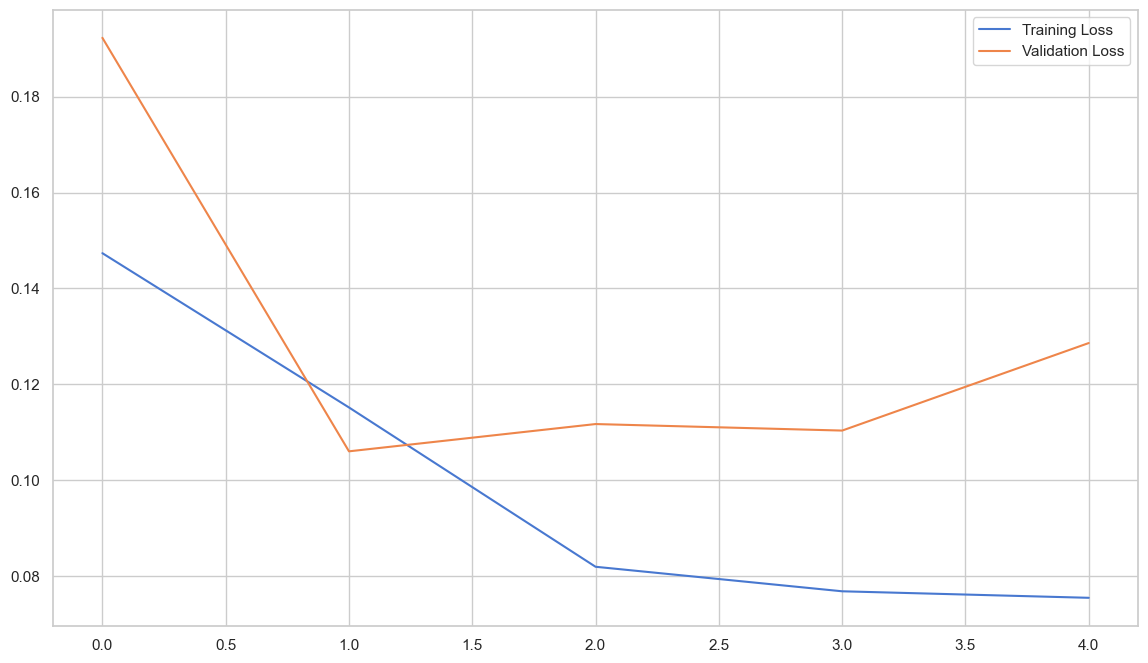

In [15]:
#Plot training loss and metrics loss

plt.plot(history.history['loss'],
        label='Training Loss') #loss values plot

plt.plot(history.history['val_loss'],
        label='Validation Loss')

plt.legend();

We see here that our validation loss is lower than training loss.

Meaning -> we underfit our training data due to high dropout values that we use (0.2). We can go back and change our dropout values and see that our training data is not overfit

In [16]:
#MSE on data

X_train_pred = model.predict(X_train)

train_mae_loss = pd.DataFrame(np.mean(np.abs(X_train_pred-X_train),axis=1),columns=['Error'])

204/204 [==============================] - 9s 31ms/step


In [17]:
model.evaluate(X_test,y_test) #total loss

51/51 [==============================] - 2s 31ms/step - loss: 1.4589


1.4588888883590698

C:\Users\user\AppData\Local\Temp\ipykernel_5472\475452265.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

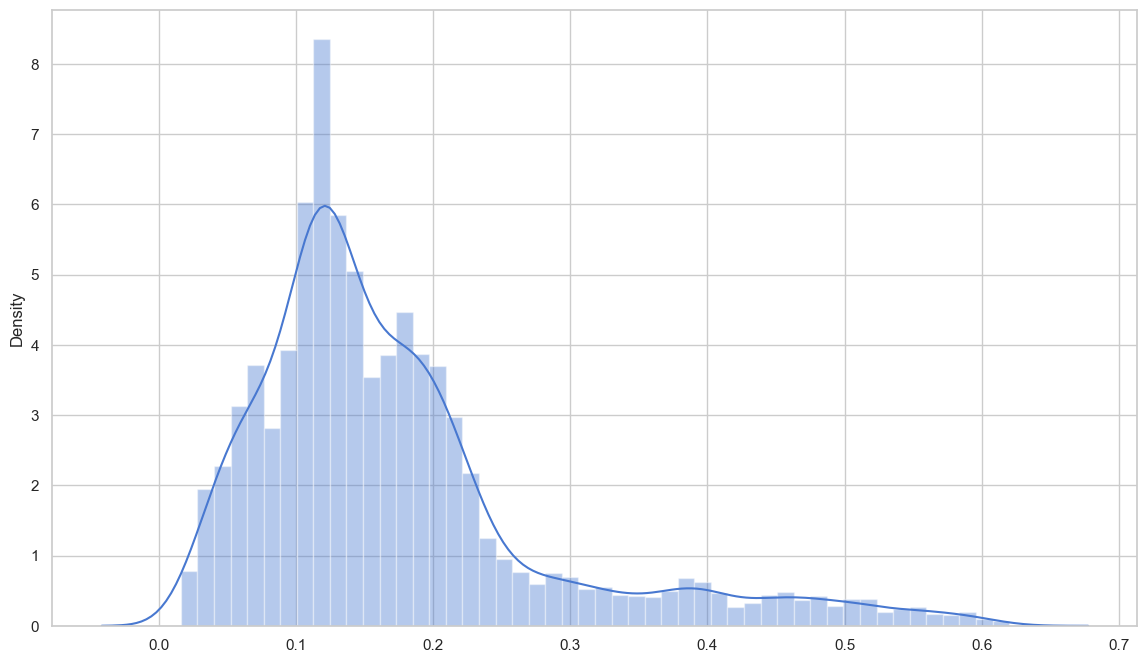

In [18]:
#Distribution of errors using seaborn

sns.distplot(train_mae_loss,bins=50,kde=True)

In [19]:
#set threshold values

threshold=1

In [20]:
X_test_pred = model.predict(X_test)

test_mae_loss = np.mean(np.abs(X_test_pred-X_test),axis=1)

51/51 [==============================] - 2s 35ms/step


## Task 8: Detect Anomalies in the S&P 500 Index Data

In [21]:
test_score_df = pd.DataFrame(test[time_steps:]) #score DF

test_score_df['loss'] = test_mae_loss
test_score_df['threshold']=threshold

#boolean value column for anomaly
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

#closing price
test_score_df['close'] = test[time_steps:].close

test_score_df.head()


,date,close,loss,threshold,anomaly
6583,2012-02-08,1.216856,0.198464,1,False
6584,2012-02-09,1.221625,0.201244,1,False
6585,2012-02-10,1.199313,0.204821,1,False
6586,2012-02-13,1.221194,0.212849,1,False
6587,2012-02-14,1.218150,0.217558,1,False


In [22]:
test_score_df.tail()

,date,close,loss,threshold,anomaly
8187,2018-06-25,4.493228,2.956340,1,True
8188,2018-06-26,4.507583,2.959592,1,True
8189,2018-06-27,4.451431,2.960927,1,True
8190,2018-06-28,4.491406,2.963465,1,True
8191,2018-06-29,4.496343,2.963371,1,True


In [23]:
#plotly to plot test values to check anomalies

fig = go.Figure()
fig.add_trace(go.Scatter(x=test[time_steps:].date,
                         y=test_score_df.loss,
                         mode='lines',
                         name='Test Loss'                         
))
fig.add_trace(go.Scatter(x=test[time_steps:].date,
                         y=test_score_df.threshold,
                         mode='lines',
                         name='Threshold'                         
))
fig.update_layout(title='S&P 500 Index (2012-2018)',
                  xaxis={'title':'Year (2012-2018)'},
                  yaxis={'title':'S&P Closing Price'},
                  showlegend=True)

fig.show()

In [24]:
#dataframe only for anomalies only

anomalies = test_score_df[test_score_df.anomaly == True]

anomalies.head()

,date,close,loss,threshold,anomaly
7043,2013-12-06,2.307606,1.005139,1,True
7044,2013-12-09,2.315466,1.006828,1,True
7045,2013-12-10,2.301686,1.008408,1,True
7046,2013-12-11,2.252796,1.011344,1,True
7047,2013-12-12,2.236691,1.016252,1,True


In [28]:
fig = go.Figure()

# Reshape the array before applying inverse_transform
original_close_prices = scaler.inverse_transform(test[time_steps:].close.values.reshape(-1, 1))

fig.add_trace(go.Scatter(x=test[time_steps:].date,
                         y=original_close_prices.flatten(),  # Flatten the 2D array to 1D
                         mode='lines',
                         name='Close price'
))
fig.add_trace(go.Scatter(x=anomalies.date,
                         y=scaler.inverse_transform(anomalies.close.values.reshape(-1, 1)).flatten(),
                         mode='markers',
                         name='Anomalies'
))
fig.update_layout(title='S&P 500 Index (2012-2018)',
                  xaxis={'title': 'Year (2012-2018)'},
                  yaxis={'title': 'S&P Closing Price'},
                  showlegend=True)


<h3 dir="rtl"> <font color='blue'>

الخط الأزرق (سعر الإغلاق):

يمثل الخط الأزرق أسعار الإغلاق الفعلية لمؤشر S&P 500 بمرور الوقت.
كل نقطة على الخط تتوافق مع سعر الإغلاق في تاريخ محدد.

النقاط البرتقالية (الشذوذ):

تمثل النقاط البرتقالية الحالات الشاذة التي اكتشفها نموذج التشفير التلقائي LSTM.
يشير الشذوذ، في هذا السياق، إلى حالة ينحرف فيها سعر الإغلاق الملحوظ بشكل كبير عن النمط المتوقع الذي تعلمه النموذج.
هذه الحالات الشاذة هي نقاط يحددها النموذج على أنها غير عادية أو غير متوقعة بناءً على الأنماط التي تم تعلمها أثناء التدريب.

العنوان والمحاور:

عنوان الرسم البياني هو "مؤشر S&P 500 (2012-2018)"، مما يشير إلى النطاق الزمني الذي تغطيه البيانات.
يتم تسمية المحور السيني باسم "العام (2012-2018)،" وهو ما يمثل المخطط الزمني.
يُسمى المحور y باسم "سعر إغلاق S&P"، وهو ما يمثل أسعار إغلاق مؤشر S&P 500.</font></h3>


<h3><font color:'red'> The main idea behind the anomaly detection model using an LSTM (Long Short-Term Memory) autoencoder is to identify patterns or instances in time series data that deviate significantly from the expected or normal behavior. Here's a breakdown of the key concepts and the main steps of the model:
1. Time Series Data:

    The model is applied to time series data, specifically the closing prices of the S&P 500 Index over a certain period (2012-2018, in this case).

2. Temporal Sequences:

    The time series data is preprocessed by creating temporal sequences. Each sequence consists of a fixed number of consecutive closing prices, and these sequences are used as input to the model.

3. LSTM Autoencoder Architecture:

    The model architecture consists of an LSTM-based autoencoder. The autoencoder is a type of neural network that aims to learn a compressed representation (encoding) of the input data and then reconstruct the input from this encoding.
    The encoder part of the autoencoder compresses the temporal sequences into a lower-dimensional representation.
    The decoder part reconstructs the input sequences from this compressed representation.

4. Training on Normal Data:

    The autoencoder is trained using only normal or typical time series data, where anomalies are assumed to be absent.
    During training, the model learns to capture the regular patterns and structures in the normal data.

5. Reconstruction Error:

    The reconstruction error is calculated as the difference between the original input sequences and their reconstructed counterparts. A higher reconstruction error indicates a larger deviation from the learned normal patterns.

6. Anomaly Detection Threshold:

    A threshold is set for the reconstruction error. Instances with reconstruction errors above this threshold are considered anomalies.

7. Visualization and Interpretation:

    The model's output, including the reconstructed sequences and identified anomalies, is visualized using Plotly. This allows analysts to inspect the anomalies in the context of the original time series data. </h3></font>

<h3> <font color='blue'>Amal_Alkraimeen_anomaly_detection</font></h3>